In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [6]:
from tensorflow.keras import datasets, layers, models
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

## Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below.

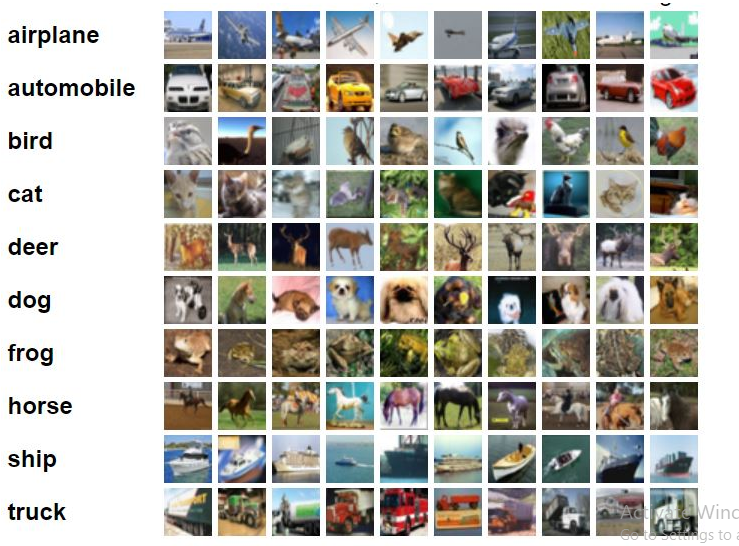

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
#converting to 1-D array

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Creating function to plot images

In [25]:
def plot_image(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y_train[index]])


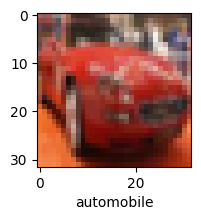

In [26]:
plot_image(X_train,y_train,5)

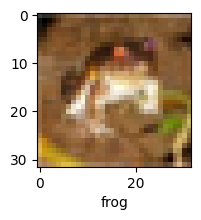

In [27]:
plot_image(X_train, y_train, 0)

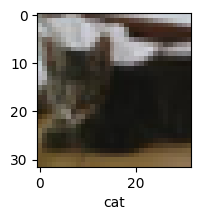

In [28]:
plot_image(X_train, y_train, 9)

### Scaling X_train

In [29]:
#normalizing X_train
X_train = X_train / 255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

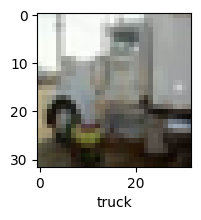

In [34]:
plot_image(X_train, y_train, 31)

### Scaling X_test

In [35]:
#normalizing X_test
X_test = X_test / 255

### Build simple artificial neural network for image classification

In [36]:


ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer = "SGD",
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

ann.evaluate(X_test, y_test)



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.2949 - loss: 1.9565
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.4068 - loss: 1.6700
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 96ms/step - accuracy: 0.4432 - loss: 1.5738
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.4651 - loss: 1.5046
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 86ms/step - accuracy: 0.4858 - loss: 1.4622
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4538 - loss: 1.5248


[1.5352532863616943, 0.4478999972343445]

So ANN gave us an accuracy of around 49% on train set and around 45% on test set

In [37]:
y_pred = ann.predict(X_test)
y_pred[:1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


array([[0.02539848, 0.10477656, 0.13082117, 0.3303152 , 0.03922988,
        0.12453839, 0.07952543, 0.0023172 , 0.15182097, 0.01125667]],
      dtype=float32)

y_pred has values like [0.4, 0.1, 0.9......] since we have 10 classes. y_pred will have 10 values/columns for each image containing probabilities for each class. So we will take the highest value using argmax. argmax will return the index of class which will have highes probability

In [38]:
y_pred_class = [np.argmax(element) for element in y_pred]

array([[0.02539848, 0.10477656, 0.13082117, 0.3303152 , 0.03922988,
        0.12453839, 0.07952543, 0.0023172 , 0.15182097, 0.01125667]],
      dtype=float32)

In [39]:
y_pred[:1]

array([[0.02539848, 0.10477656, 0.13082117, 0.3303152 , 0.03922988,
        0.12453839, 0.07952543, 0.0023172 , 0.15182097, 0.01125667]],
      dtype=float32)

In [40]:
y_pred_class[:1]

[3]

In [41]:
from sklearn.metrics import classification_report

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.39      0.48      1000
           1       0.42      0.75      0.54      1000
           2       0.30      0.51      0.38      1000
           3       0.37      0.35      0.36      1000
           4       0.57      0.21      0.31      1000
           5       0.46      0.24      0.31      1000
           6       0.55      0.46      0.50      1000
           7       0.70      0.37      0.48      1000
           8       0.42      0.79      0.55      1000
           9       0.51      0.42      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



### Now let us build a convolutional neural network to train our images

In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu' ,input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [46]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.1836 - loss: 2.1948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.3652 - loss: 1.7836
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.4607 - loss: 1.5094
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.5067 - loss: 1.3914
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.5309 - loss: 1.3142
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5618 - loss: 1.2418
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.5798 - loss: 1.1821
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.6054 - loss: 1.1260
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6212 - loss: 1.0787
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6403 - loss: 1.0344


In [47]:
y_pred = cnn.predict(X_test)
y_pred[:1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[0.06053469, 0.02450514, 0.1016258 , 0.468196  , 0.01506034,
        0.19924928, 0.02563401, 0.01595202, 0.08187507, 0.00736766]],
      dtype=float32)

In [49]:
y_pred_class = [np.argmax(element) for element in y_pred ]
y_pred_class[:1]

[3]

In [50]:
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.70      0.67      1000
           1       0.64      0.76      0.70      1000
           2       0.63      0.37      0.46      1000
           3       0.43      0.42      0.43      1000
           4       0.65      0.48      0.55      1000
           5       0.58      0.43      0.50      1000
           6       0.69      0.68      0.69      1000
           7       0.72      0.60      0.65      1000
           8       0.70      0.75      0.72      1000
           9       0.46      0.81      0.58      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.59     10000
weighted avg       0.61      0.60      0.59     10000



In [53]:
y_pred_class[:5]

[3, 1, 8, 0, 6]

In [54]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)